# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


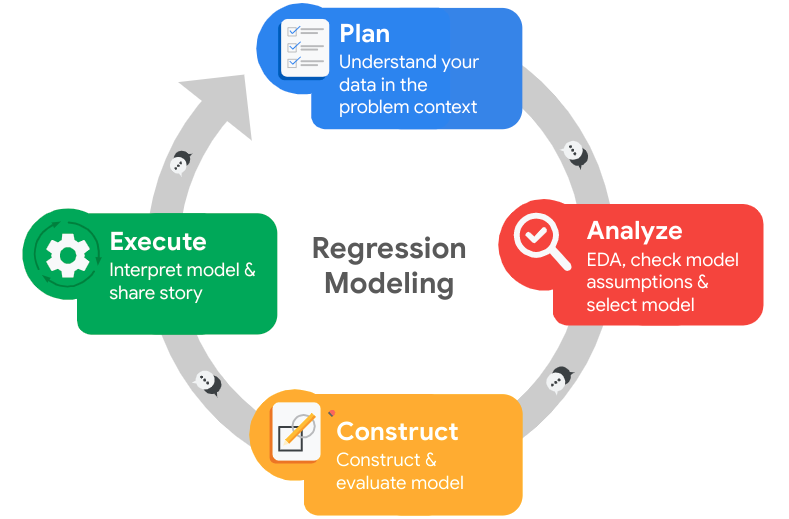

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_curve,roc_auc_score


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [6]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
# Rename columns as needed
df0.columns = df0.columns.str.lower()

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                   'time_spend_company':'tenure'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [14]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [15]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


- It seems quite unlikely that the same employees will have the same values across multiple columns.
- We'll proceed with dropping them.

In [5]:
df = df0.drop_duplicates(keep='first')

df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
df0.shape,df.shape

((14999, 10), (11991, 10))

### Check outliers

Check for outliers in the data.

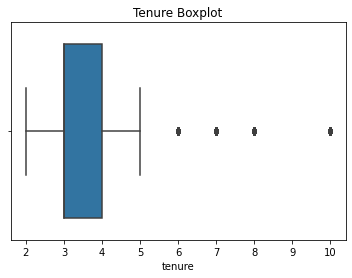

In [29]:
sns.boxplot(x='tenure',data=df)
plt.title('Tenure Boxplot')
plt.show()

In [9]:
# Calculating the number of rows with outliers in the dataset

percentile_25 = df['tenure'].quantile(0.25)
percentile_75 = df['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper = (percentile_75 + 1.5) * iqr
lower = (percentile_25 - 1.5) * iqr

outliers = df[(df['tenure'] < lower) | (df['tenure'] > upper)]
print(f'Rows with Outliers: {len(outliers)}')

Rows with Outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [39]:
# Get numbers of people who left vs. stayed
print('Employee Count')
print(df['left'].value_counts())
print('\n')
print('Employee percentage')
print(df['left'].value_counts(normalize=True)*100)


Employee Count
0    10000
1     1991
Name: left, dtype: int64


Employee percentage
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [42]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

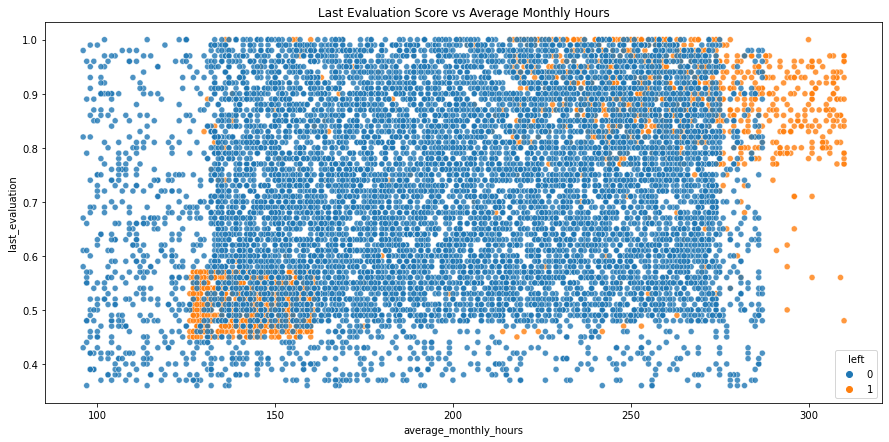

In [61]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='average_monthly_hours',y='last_evaluation',hue='left',data=df,alpha=0.8)
plt.title('Last Evaluation Score vs Average Monthly Hours')
plt.show()

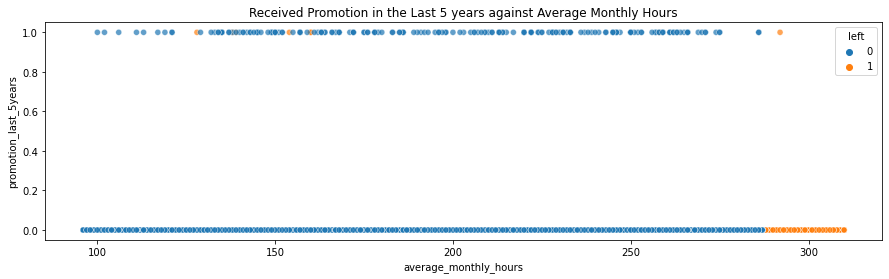

In [60]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='average_monthly_hours',y='promotion_last_5years',hue='left',data=df,alpha=0.7)
plt.title('Received Promotion in the Last 5 years against Average Monthly Hours')
plt.show()

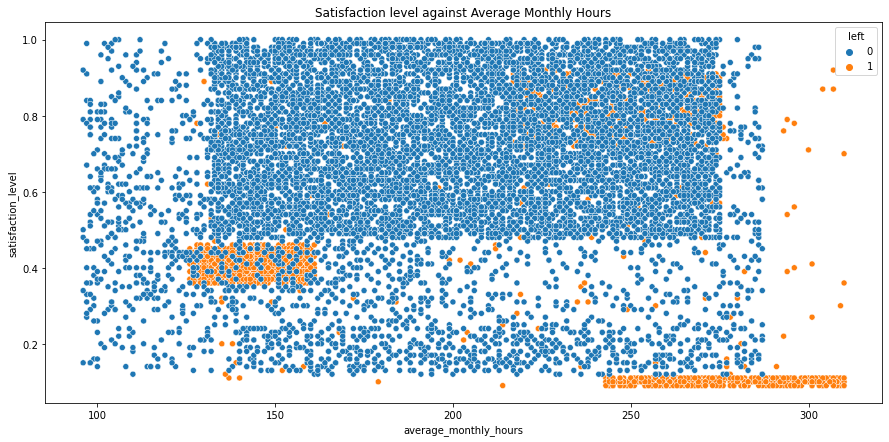

In [59]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='average_monthly_hours',y='satisfaction_level',hue='left',data=df)
plt.title('Satisfaction level against Average Monthly Hours')
plt.show()

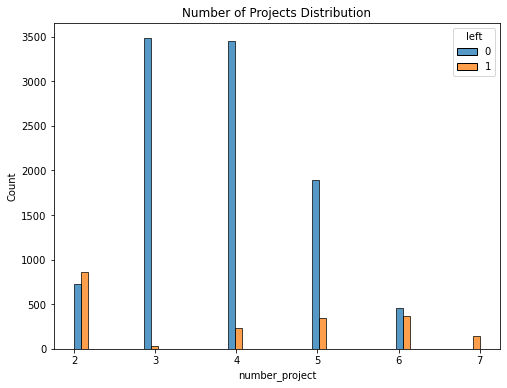

In [72]:
plt.figure(figsize=(8,6))
sns.histplot(x='number_project',data=df,hue='left',multiple='dodge')
plt.title('Number of Projects Distribution')
plt.show()

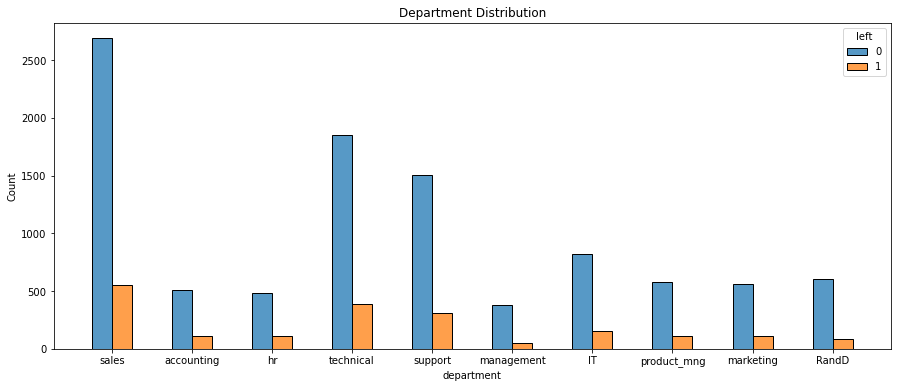

In [77]:
plt.figure(figsize=(15,6))
sns.histplot(x='department',data=df,hue='left',multiple='dodge',shrink=0.5)
plt.title('Department Distribution')
plt.show()

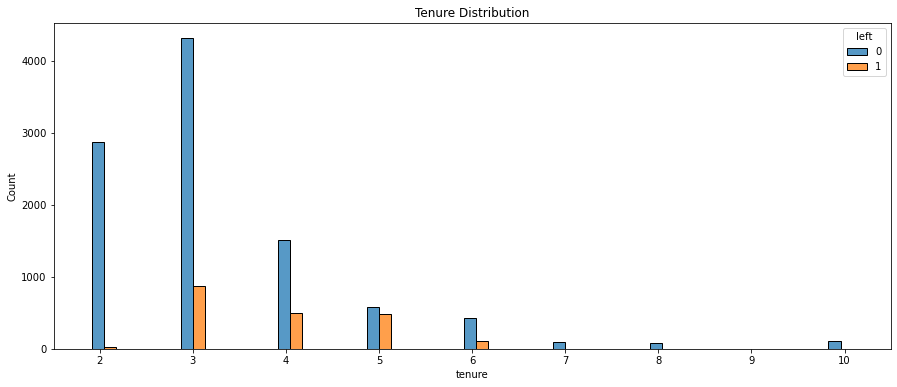

In [81]:
plt.figure(figsize=(15,6))
sns.histplot(x='tenure',data=df,hue='left',multiple='dodge',shrink=3)
plt.title('Tenure Distribution')
plt.show()

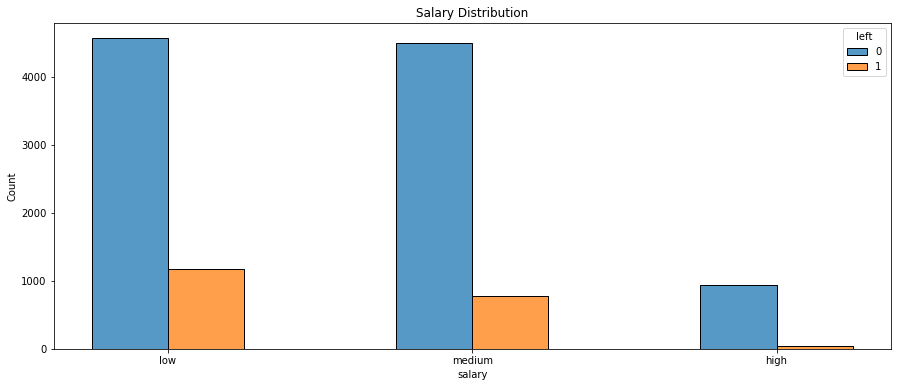

In [84]:
plt.figure(figsize=(15,6))
sns.histplot(x='salary',data=df,hue='left',multiple='dodge',shrink=0.5)
plt.title('Salary Distribution')
plt.show()

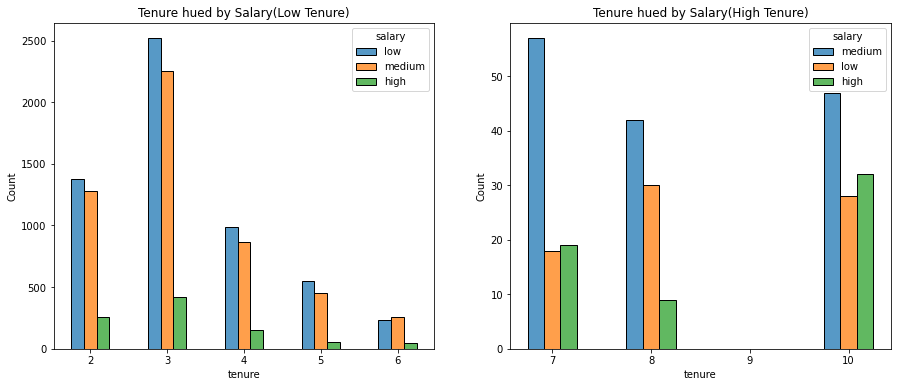

In [114]:
# Salary by tenure

short_tenure = df[df['tenure'] < 7]
long_tenure = df[df['tenure'] >= 7]

fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='tenure',hue='salary',data=short_tenure,multiple='dodge',discrete=1,shrink=0.5,ax=ax[0])
ax[0].set_title('Tenure hued by Salary(Low Tenure)')
sns.histplot(x='tenure',hue='salary',data=long_tenure,multiple='dodge',discrete=1,shrink=0.5,ax=ax[1])
ax[1].set_title('Tenure hued by Salary(High Tenure)')
ax[1].set_xticks([7,8,9,10])
plt.show()

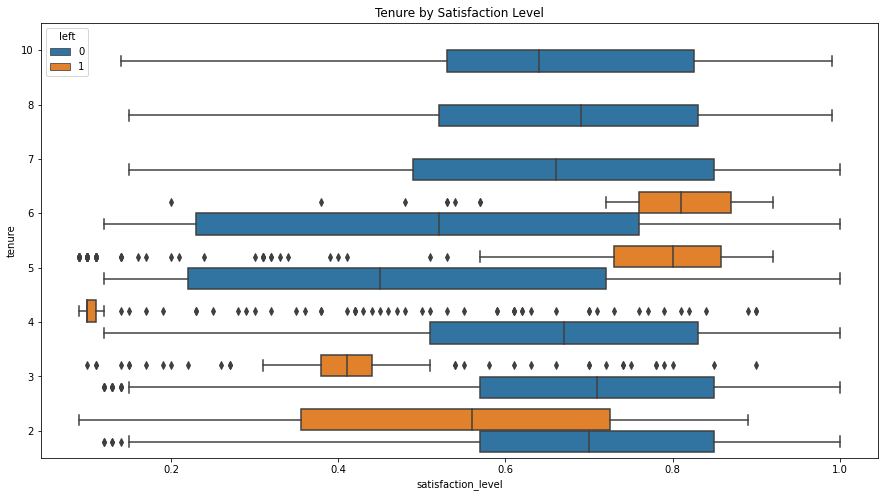

In [126]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='satisfaction_level',y='tenure',data=df,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Tenure by Satisfaction Level')
plt.show()

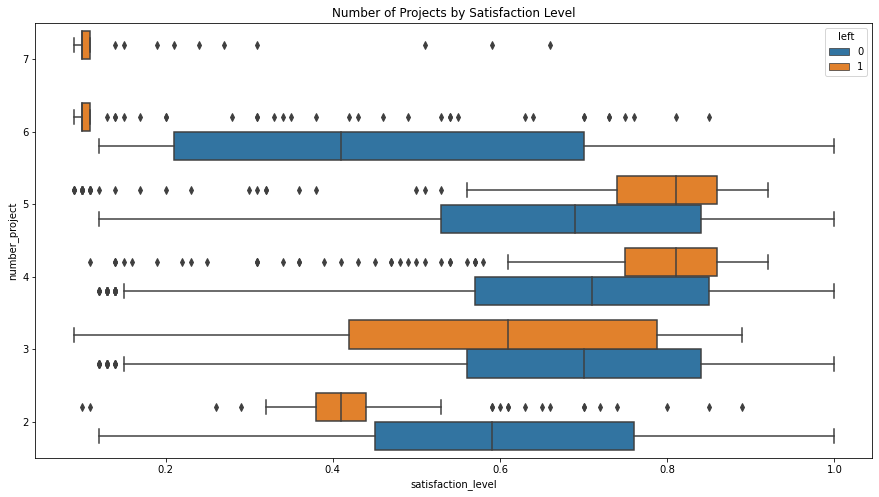

In [128]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='satisfaction_level',y='number_project',data=df,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Number of Projects by Satisfaction Level')
plt.show()

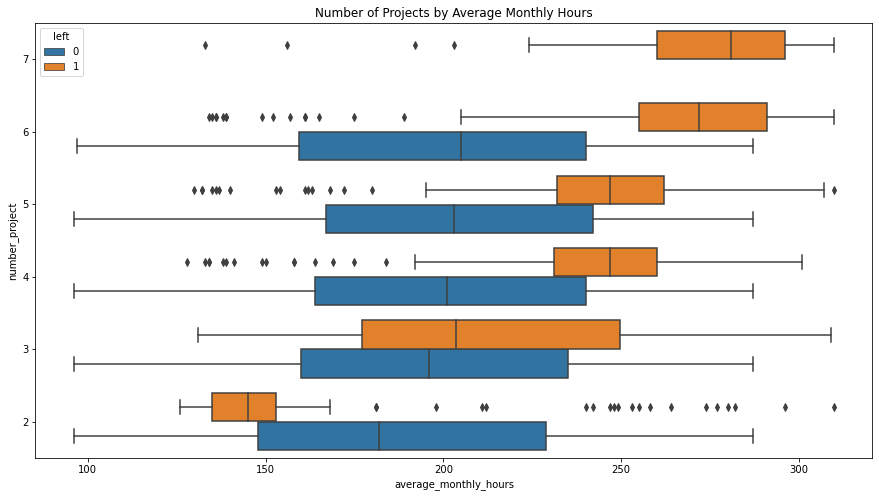

In [129]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='average_monthly_hours',y='number_project',data=df,orient='h',hue='left')
ax.invert_yaxis()
plt.title('Number of Projects by Average Monthly Hours')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

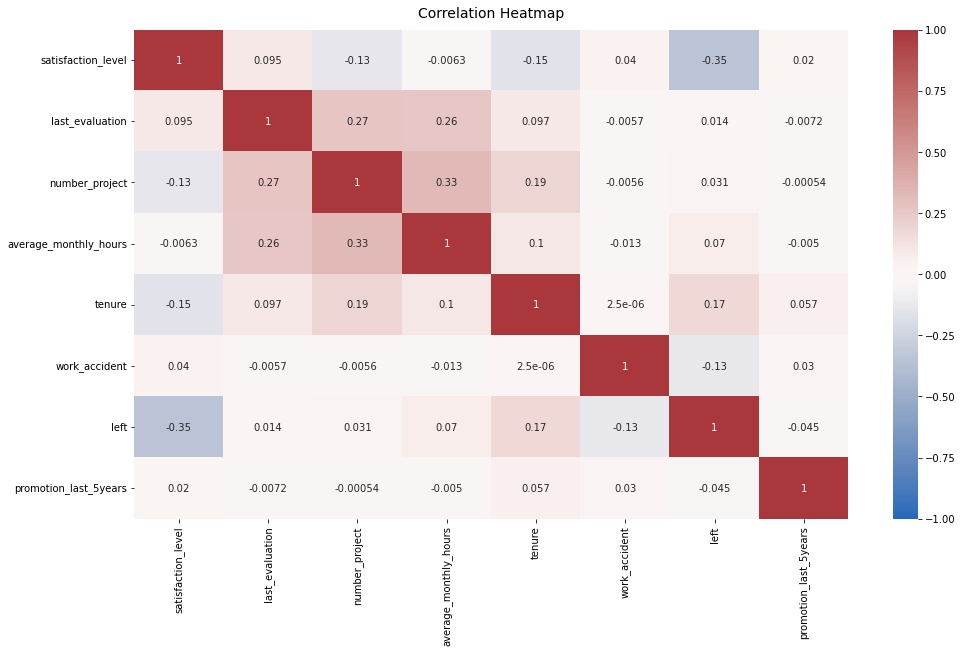

In [132]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

### Insights

- It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

- Logistic regression model
- Decision trees
- Random Forest classifier

### Modeling

In [130]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Encoding the caregorical features

df_enc = df.copy()

# Encoding the ordinal salary column

df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes

In [7]:
# Encoding the department column

df_enc = pd.get_dummies(df_enc,drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df_lr = df_enc[(df_enc['tenure'] >= lower) & (df_enc['tenure'] <= upper)]

In [12]:
df_lr.shape

(11167, 19)

In [116]:
# Separating the target and independent variables

X = df_lr.drop('left',axis=1)
y = df_lr['left']

In [117]:
# splitting into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [118]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8375, 18)
(2792, 18)
(8375,)
(2792,)


In [18]:
# instantiating and fitting the model

lr = LogisticRegression(max_iter=500,random_state=0).fit(X_train,y_train)

In [19]:
y_pred_lr = lr.predict(X_test)

In [20]:
print(f" Accuracy : {accuracy_score(y_test,y_pred_lr)}")
print(f" Precision : {precision_score(y_test,y_pred_lr)}")
print(f" Recall : {recall_score(y_test,y_pred_lr)}")
print(f" f1 : {f1_score(y_test,y_pred_lr)}")


 Accuracy : 0.8255730659025788
 Precision : 0.4666666666666667
 Recall : 0.23779193205944799
 f1 : 0.31504922644163147


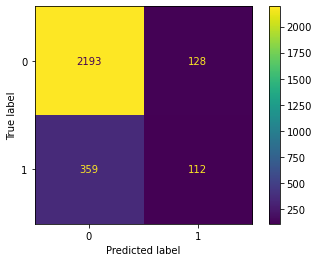

In [22]:
# Create a confusion matrix

conf_mat = confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=lr.classes_)
disp.plot(values_format='')
plt.show()

In [57]:
# Modelling using the SGD Classifier due to the class imbalance

class_weights = {0: 1.0, 1: 5.0}

# Instantiate the model
model = SGDClassifier(loss='log', class_weight=class_weights,random_state=42)

In [58]:
sgd = model.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [59]:
print(f" Accuracy : {accuracy_score(y_test,y_pred_sgd)}")
print(f" Precision : {precision_score(y_test,y_pred_sgd)}")
print(f" Recall : {recall_score(y_test,y_pred_sgd)}")
print(f" f1 : {f1_score(y_test,y_pred_sgd)}")


 Accuracy : 0.792621776504298
 Precision : 0.44386694386694386
 Recall : 0.9065817409766455
 f1 : 0.5959525471039777


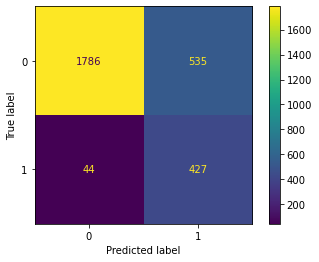

In [60]:
conf_mat = confusion_matrix(y_test,y_pred_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=sgd.classes_)
disp.plot(values_format='')
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives

In [61]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [62]:
# Create classification report for sgd model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_sgd, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.77      0.86      2321
    Predicted would leave       0.44      0.91      0.60       471

                 accuracy                           0.79      2792
                macro avg       0.71      0.84      0.73      2792
             weighted avg       0.89      0.79      0.82      2792



The classification report above shows that the logistic regression model achieved a precision of 86%, recall of 94%, f1-score of 90% (all weighted averages), and accuracy of 79%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

## Random Forest Model

In [119]:
rf = RandomForestClassifier(random_state=0)

rf_params = {'min_samples_split':[1,2],
            'min_samples_leaf':[2,3],
            'n_estimators':[300,500],
            'max_features':["sqrt"],
            'max_samples':[0.5,0.9]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

model1 = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='f1') 

In [120]:
%%time
model1.fit(X_train,y_train)

CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [121]:
# Checking the model best score

model1.best_score_

0.9449776991088864

In [122]:
# best params

model1.best_params_

{'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [70]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [123]:
results1 = make_results('Random Forest',model1,'f1')
results1

,model,precision,recall,F1,accuracy,auc
0,Random Forest,0.985369,0.907864,0.944978,0.982209,0.981319


In [72]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [125]:
test_score1 = get_scores('Random Forest Test',model1,X_test,y_test)
test_score1

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Test,0.990909,0.92569,0.95719,0.986032,0.961983


In [126]:
# Plotting a confusion matrix

y_pred_rf = model1.predict(X_test)

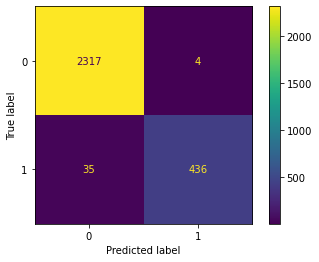

In [127]:
conf_mat = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=model.classes_)
disp.plot(values_format='')
plt.show()

In [77]:
# Classification Report

target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2321
    Predicted would leave       0.99      0.93      0.96       471

                 accuracy                           0.99      2792
                macro avg       0.99      0.96      0.97      2792
             weighted avg       0.99      0.99      0.99      2792



## Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The random forest model included all variables as features. This next round will incorporate feature engineering to build an improved model. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [78]:
df2 = df_enc.drop('satisfaction_level',axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
print(f' Minimum monthly hours: {df2["average_monthly_hours"].min()}')
print(f' Maximum monthly hours: {df2["average_monthly_hours"].max()}')

 Minimum monthly hours: 96
 Maximum monthly hours: 310


Let's define being overworked as working more than 175 hours per month on average

In [79]:
# create an overworked column

df2['overworked'] = df2['average_monthly_hours']

In [85]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)

In [86]:
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [128]:
X = df2.drop('left',axis=1)
y = df2['left']

In [129]:
# Splitting the dataframe again

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [130]:
rf = RandomForestClassifier(random_state=0)

rf_params = {'min_samples_split':[1,2],
            'min_samples_leaf':[2,3],
            'n_estimators':[300,500],
            'max_features':["sqrt"],
            'max_samples':[0.5,0.9]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

model2 = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='f1')

In [131]:
%%time
model2.fit(X_train,y_train)

CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 1min 9s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [132]:
model2.best_score_

0.9159340029949616

In [133]:
model2.best_params_

{'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [134]:
# Grabbing the cv results
rf2_results = make_results('Random Forest 2', model2, 'f1')

In [95]:
rf2_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest 2,0.942551,0.890824,0.915934,0.972868,0.974776


In [135]:
# Grabbing the test results
rf2_test_scores = get_scores('Random Forest 2 Test', model2, X_test, y_test)

In [98]:
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 2 Test,0.952891,0.893574,0.92228,0.974983,0.942387


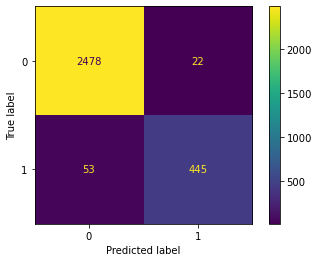

In [137]:
# Confusion matrix
y_pred_rf2 = model2.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=model2.classes_)
disp.plot(values_format='')
plt.show()

In [138]:
# Classification Report

target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_rf2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2500
    Predicted would leave       0.95      0.89      0.92       498

                 accuracy                           0.97      2998
                macro avg       0.97      0.94      0.95      2998
             weighted avg       0.97      0.97      0.97      2998



In [139]:
# feature importances

importances = model1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances,index=X_test.columns)

Text(0.5, 1.0, 'Feature Importane')

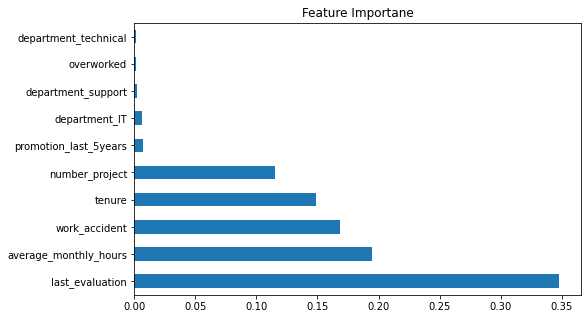

In [140]:
rf_importances.sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,5))
plt.title('Feature Importane')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.